# Naive Bayes

Here we will use the Social Network Ads dataset to predict when someone will purchase or not

In [2]:
#Importing the libaries needed for this projetct:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [3]:
#importing the dataset into a dataframe

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [4]:
#Understanding a litle about our data
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Preparing the data to be used in a prediction model

In [5]:
#splitting the dataset into training and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
#Standardizing our dataset
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [12]:
#Training the Naive Bayes model with our data, and checking how well the model can predict our dataset by the result of the score function
clf = GaussianNB()
clf.fit(x_train_sc, y_train)
clf.score(x_test_sc, y_test)

0.9

In [9]:
#In order to understand the result, is common to check the confusion matrix of our results
from sklearn.metrics import confusion_matrix

# Generating the predicted results from the test set using the trained model
y_pred = clf.predict(x_test_sc)

#creating a confusion matrix about the results from the output of the model and it's expected values
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[65  3]
 [ 7 25]]


### Visualizing our results

In [10]:
#Creating a function to plot a 2D representation of our independent variables and the area our model creates to separete the classification results
from matplotlib.colors import ListedColormap

def grid_result(x, y, title, xl, yl):
    x_set, y_set = x, y

    X1, X2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 1, stop=x_set[:,0].max() + 1, step = 0.01),
                        np.arange(start=x_set[:,1].min() - 1, stop=x_set[:,1].max() + 1, step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                alpha=0.75, cmap = ListedColormap(('red', 'green')))    

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], 
        c = ListedColormap(('red', 'green'))(i), label = j)

    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.legend()
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


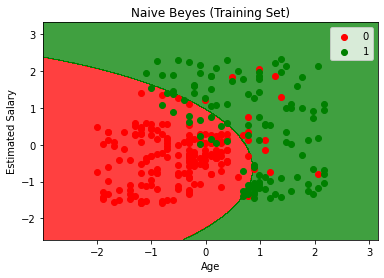

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


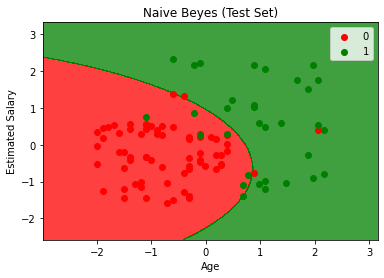

In [11]:

#Generating the visualization from train set and test set:

#Train set:
grid_result(
    x=x_train_sc, 
    y=y_train, 
    title='Naive Beyes (Training Set)', 
    xl='Age', 
    yl='Estimated Salary'
)

#Test set:
grid_result(
    x=x_test_sc, 
    y=y_test, 
    title='Naive Beyes (Test Set)', 
    xl='Age', 
    yl='Estimated Salary'
)